In [1]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 7.0 MB/s eta 0:00:00


In [2]:
import gymnasium as gym
import numpy as np
import random
import time

In [3]:
env = gym.make('FrozenLake-v1', render_mode="rgb_array")

In [4]:
# Initialize Q-value table randomly
q_table = np.zeros((env.observation_space.n, env.action_space.n))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [5]:
# Hyperparameters
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005

num_episodes = 20000
num_steps_per_episode = 100 # Each environment can have a different episode length

In [6]:
def q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state, _ = env.reset()

        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)
        for step in range(num_steps_per_episode):
            exploration = random.uniform(0,1)
            if exploration < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state, :])

            next_state, reward, terminated, truncated, _ = env.step(action)
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * np.max(q_table[next_state,:]))

            reward_episode += reward
            state = next_state

            if terminated or truncated:
                done = True

            if done:
                break
        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

In [23]:
q_table, rewards_all = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [24]:
q_table

array([[5.47686118e-01, 4.91646899e-01, 5.05150779e-01, 4.90979973e-01],
       [2.21479260e-01, 2.92456518e-01, 2.17248944e-01, 4.95571795e-01],
       [2.83715624e-01, 2.40789106e-01, 2.59041073e-01, 4.54795952e-01],
       [0.00000000e+00, 3.20157665e-05, 7.11990950e-02, 4.41891036e-01],
       [5.59724769e-01, 3.73432421e-01, 4.02222066e-01, 3.34592131e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.13022650e-01, 5.25588834e-02, 1.62474113e-01, 1.29813278e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.52354927e-01, 5.02016606e-01, 3.91505374e-01, 5.90695947e-01],
       [4.40944945e-01, 6.31443501e-01, 4.34364699e-01, 3.85962565e-01],
       [5.99950420e-01, 3.76425700e-01, 3.32190818e-01, 3.27357157e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.87957304e-01, 5.31401870e-01, 7.65901985e

In [25]:
sum(rewards_all)

12642.0

In [26]:
sum(rewards_all[0:1000])

168.0

In [27]:
sum(rewards_all[1000:2000])

565.0

In [28]:
sum(rewards_all[2000:3000])

582.0

In [29]:
sum(rewards_all[9000:10000])

633.0

In [30]:
sum(rewards_all[19000:20000])

677.0

In [31]:
from IPython import display as ipythondisplay
import matplotlib.pyplot as plt

In [32]:
def play(env, q_table, render=False):
    state, _ = env.reset()
    total_reward = 0
    steps = 0
    done = False

    if render:
        plt.axis('off')

    while not done:
        action = np.argmax(q_table[state, :])
        next_state, reward, terminated, truncated, _ = env.step(action)
        total_reward += reward
        steps += 1
        if render:
            print(f"{state} --> {next_state}")
            time.sleep(0.5)
            # screen = env.render(mode='rgb_array')
            screen = env.render()
            plt.imshow(screen)
            ipythondisplay.clear_output(wait=True)
            ipythondisplay.display(plt.gcf())
            time.sleep(0.1)

        if terminated or truncated:
            done = True

        state = next_state

    return (total_reward, steps)

In [33]:
def play_multiple_times(env, q_table, max_episodes):
    success = 0
    list_of_steps = []
    for i in range(max_episodes):
        total_reward, steps = play(env, q_table)

        if total_reward > 0:
            success += 1
            list_of_steps.append(steps)

    print(f'Number of successes: {success}/{max_episodes}')
    print(f'Average number of steps: {np.mean(list_of_steps)}')

In [34]:
play_multiple_times(env, q_table, 1000)

Number of successes: 775/1000
Average number of steps: 39.19225806451613


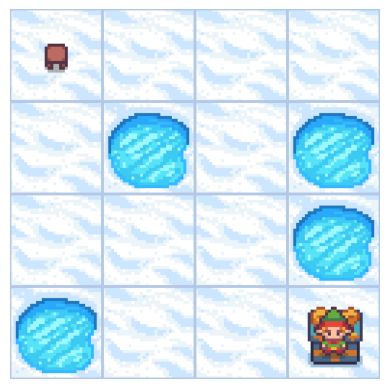

(1.0, 34)

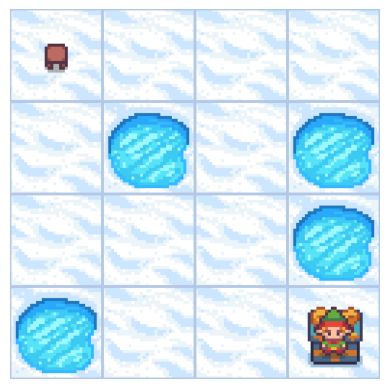

In [36]:
play(env, q_table, render=True)

In [37]:
window = 100
average_y = []
for ind in range(len(rewards_all) - window + 1):
    average_y.append(np.mean(rewards_all[ind:ind+window]))

In [38]:
for ind in range(window - 1):
    average_y.insert(0, np.nan)

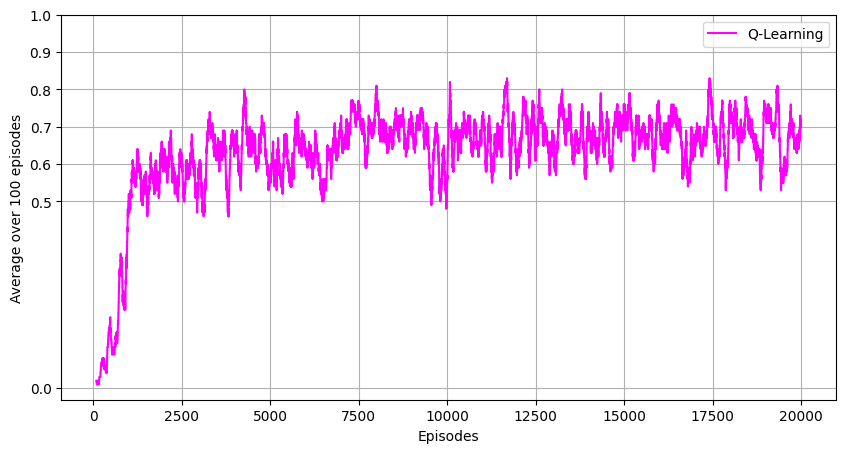

In [39]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all)), average_y, color='magenta', label='Q-Learning')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()

# START HERE

In [40]:
import gc
del env
gc.collect()

8880

**Define Sarsa**

In [46]:
def sarsa_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state, _ = env.reset()
        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)
        exploration = random.uniform(0,1)
        if exploration < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state, :])
        for step in range(num_steps_per_episode):
            next_state, reward, terminated, truncated, _ = env.step(action)

            exploration = random.uniform(0,1)
            if exploration < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(q_table[next_state, :])

            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate*(reward + gamma * q_table[next_state,next_action])

            reward_episode += reward
            state = next_state
            action = next_action

            if terminated or truncated:
                done = True

            if done:
                break
        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

**FrozenLake-v1**

Khởi tạo

In [ ]:
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005
num_episodes = 20000
num_steps_per_episode = 100
env = gym.make('FrozenLake-v1')

Chạy Q-Learning và SARSA

In [ ]:
time1= time.time()
q_table_q, rewards_q = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
time2= time.time()
q_table_s, rewards_s = sarsa_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
time3= time.time()
print("\nQ_Learning:")
play_multiple_times(env, q_table_q, 1000)
print("\nSARSA: ")
play_multiple_times(env, q_table_s, 1000)
print("\nTime Q_Learning for FrozenLake-v1: {:.3f}".format(time2-time1))
print("Time SARSA  for FrozenLake-v1: {:.3f}".format(time3-time2))

Episode 19999 finished
Episode 19999 finished

Q_Learning:
Number of successes: 735/1000
Average number of steps: 37.56734693877551

SARSA: 
Number of successes: 729/1000
Average number of steps: 37.3758573388203

Time Q_Learning for FrozenLake-v1: 26.127
Time SARSA  for FrozenLake-v1: 15.180


Vẽ đồ thị minh họa hiệu năng của SARSA so với Q-Learning

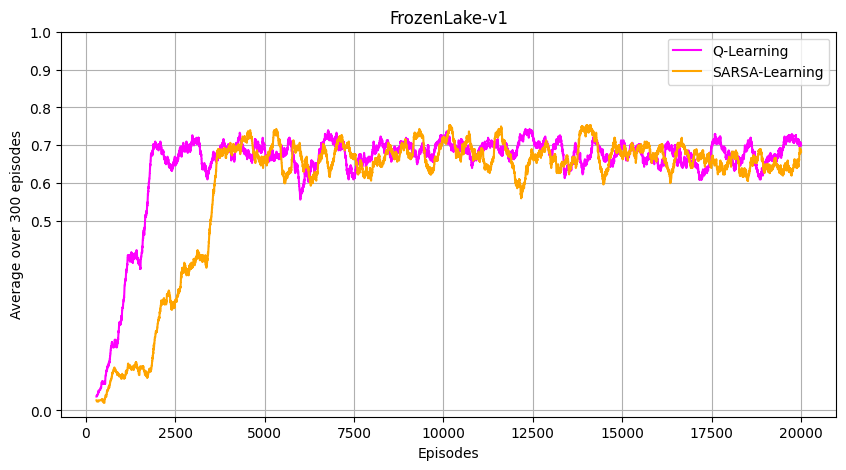

In [ ]:
window = 300
average_y_q = []
average_y_s = []
for ind in range(len(rewards_q) - window + 1):
    average_y_q.append(np.mean(rewards_q[ind:ind+window]))
for ind in range(len(rewards_s) - window + 1):
    average_y_s.append(np.mean(rewards_s[ind:ind+window]))
for ind in range(window - 1):
    average_y_q.insert(0, np.nan)
    average_y_s.insert(0, np.nan)


plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_q)), average_y_q, color='magenta', label='Q-Learning')
plt.plot(np.arange(len(rewards_s)), average_y_s, color='orange', label='SARSA-Learning')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.title("FrozenLake-v1")
plt.show()

Nhận xét

*   Q-Learning hội tụ nhanh hơn SARSA (cần ít episodes hơn)

*   Q-Learning hoạt động tốt hơn khi số lượng episodes nhỏ

*   Thời gian chạy của SARSA nhanh hơn nhiều so với Q-Learning (15.180s so với 26.127s)

*   Sau khi training với cùng params, số ván chơi thắng và số bước trung bình trong mỗi ván chơi của Q-Learning và SARSA gần như tương đồng







**FrozenLake8x8-v1**

Khởi tạo

In [56]:
gamma = 0.9
learning_rate = 0.66
max_epsilon = 1.0
min_epsilon = 0.001
epsilon_decay_rate = 0.00005
num_episodes = 250000
num_steps_per_episode = 500
env = gym.make('FrozenLake8x8-v1')

Chạy Q-Learning và SARSA

In [57]:
time1= time.time()
q_table_q, rewards_q = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
time2= time.time()
q_table_s, rewards_s = sarsa_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
time3= time.time()
print("\nQ_Learning:")
play_multiple_times(env, q_table_q, 1000)
print("\nSARSA: ")
play_multiple_times(env, q_table_s, 1000)
print("\nTime Q_Learning for FrozenLake8x8-v1: {:.3f}".format(time2-time1))
print("Time SARSA  for FrozenLake8x8-v1: {:.3f}".format(time3-time2))

Episode 249999 finished
Episode 249999 finished

Q_Learning:
Number of successes: 530/1000
Average number of steps: 82.32075471698113

SARSA: 
Number of successes: 702/1000
Average number of steps: 87.86324786324786

Time Q_Learning for FrozenLake8x8-v1: 594.549
Time SARSA  for FrozenLake8x8-v1: 382.640


Vẽ đồ thị minh họa hiệu năng của SARSA so với Q-Learning

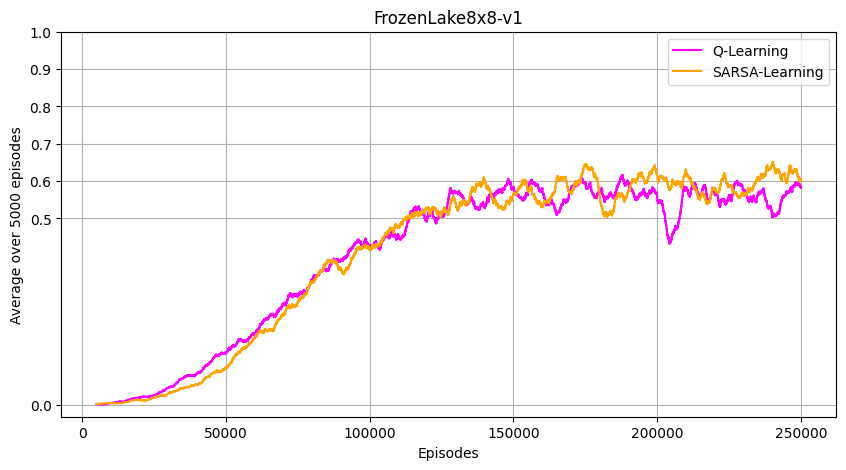

In [58]:
window = 5000
average_y_q = []
average_y_s = []
for ind in range(len(rewards_q) - window + 1):
    average_y_q.append(np.mean(rewards_q[ind:ind+window]))
for ind in range(len(rewards_s) - window + 1):
    average_y_s.append(np.mean(rewards_s[ind:ind+window]))
for ind in range(window - 1):
    average_y_q.insert(0, np.nan)
    average_y_s.insert(0, np.nan)


plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_q)), average_y_q, color='magenta', label='Q-Learning')
plt.plot(np.arange(len(rewards_s)), average_y_s, color='orange', label='SARSA-Learning')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.title("FrozenLake8x8-v1")
plt.show()

Nhận xét
*   SARSA chạy nhanh hơn đáng kể so với Q-Learning (382.640s so với 594.549s)

*   Q-Learning vượt trội so với SARSA trong các episodes đầu tiên

*   Sau mỗi lần training với cùng params, số ván chơi thắng của 2 thuật toán có chênh lệch, tùy lúc có thể Sarsa có tỉ lệ thắng tốt hơn hoặc ngược lại. Với lần train này thì Sarsa có tỉ lệ thắng tốt hơn Q-Learning
*   Số bước trung bình trong mỗi ván chơi của Q-Learning và SARSA gần như tương đồng




**Taxi-v3**

Khởi tạo

In [ ]:
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005
num_episodes = 5000
num_steps_per_episode = 100
env = gym.make('Taxi-v3')

Chạy Q-Learning và SARSA

In [ ]:
time1= time.time()
q_table_q, rewards_q = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
time2= time.time()
q_table_s, rewards_s = sarsa_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
time3= time.time()
print("\nQ_Learning:")
play_multiple_times(env, q_table_q, 1000)
print("\nSARSA: ")
play_multiple_times(env, q_table_s, 1000)
print("\nTime Q_Learning for Taxi-v3: {:.3f}".format(time2-time1))
print("Time SARSA  for Taxi-v3: {:.3f}".format(time3-time2))

Episode 4999 finished
Episode 4999 finished

Q_Learning:
Number of successes: 1000/1000
Average number of steps: 13.18

SARSA: 
Number of successes: 1000/1000
Average number of steps: 13.062

Time Q_Learning for Taxi-v3: 6.679
Time SARSA  for Taxi-v3: 4.216


Vẽ đồ thị minh họa hiệu năng của SARSA so với Q-Learning

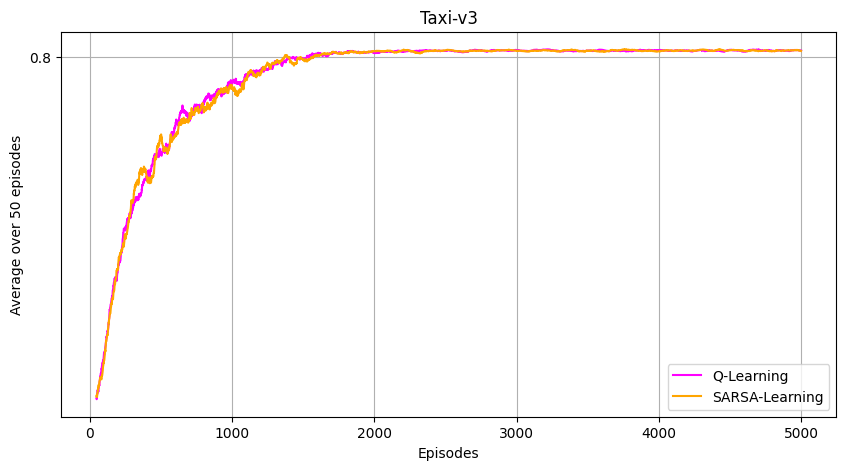

In [ ]:
window = 50
average_y_q = []
average_y_s = []
for ind in range(len(rewards_q) - window + 1):
    average_y_q.append(np.mean(rewards_q[ind:ind+window]))
for ind in range(len(rewards_s) - window + 1):
    average_y_s.append(np.mean(rewards_s[ind:ind+window]))
for ind in range(window - 1):
    average_y_q.insert(0, np.nan)
    average_y_s.insert(0, np.nan)


plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_q)), average_y_q, color='magenta', label='Q-Learning')
plt.plot(np.arange(len(rewards_s)), average_y_s, color='orange', label='SARSA-Learning')
plt.yticks([0.8])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.title("Taxi-v3")
plt.show()

Nhận xét
* Ở bài toán đơn giản này, không cần nhiều số lượng episodes để cả SARSA và Q-Learning hội tụ nhanh chóng.
* Cả 2 đều cho số ván chơi thành công là 1000/1000 với số bước gần như tương đồng.
* Thời gian chạy của SARSA (4.216s) nhanh hơn một chút so với Q-Learning (6.679s).






# Nhận xét chung


*   **Q-learning hội tụ đến chính sách tối ưu nhanh hơn SARSA:**  lí do vì Q-learning học giá trị Q dựa trên chính sách tối ưu, Q-learning luôn cập nhật các giá trị Q dựa trên giá trị tối đa của hành động tiếp theo
*   **SARSA chạy nhanh hơn Q-learning:** Khi chạy, SARSA thường nhanh hơn vì nó chỉ cần đánh giá chính sách hiện tại để quyết định hành động tiếp theo, trong khi Q-learning cần xác định hành động có giá trị Q cao nhất tại mỗi bước, yêu cầu thêm tính toán.

